In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
train = pd.read_csv('Train data.csv')
test = pd.read_csv('Test data.csv')
train.drop('id', axis=1, inplace=True)
test.drop('id', axis=1, inplace=True)

In [3]:
print('Total records in train is', train.shape[0], ', and in test is '+ str(test.shape[0])+ '.')

Total records in train is 31647 , and in test is 13564.


In [4]:
train.isnull().sum()

customer_age                          619
job_type                                0
marital                               150
education                               0
default                                 0
balance                               399
housing_loan                            0
personal_loan                         149
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 311
num_contacts_in_campaign              112
days_since_prev_campaign_contact    25831
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed                 0
dtype: int64

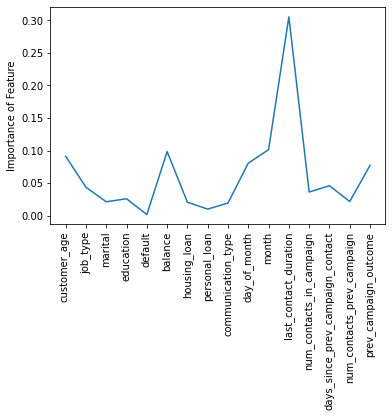

In [5]:
from sklearn.ensemble import RandomForestClassifier
X = train.copy()


y = train.term_deposit_subscribed
X = X.drop('term_deposit_subscribed', axis=1)


X = X.fillna(-999)


for c in train.columns[train.dtypes == 'object']:
    X[c] = X[c].factorize()[0]
    
rf = RandomForestClassifier()
rf.fit(X,y)

plt.plot(rf.feature_importances_)
plt.ylabel('Importance of Feature')
plt.xticks(np.arange(X.shape[1]), X.columns.tolist(), rotation=90);

## Few features are very dominant in the model, namely, Last contact duration, month, previous campaign outcome, day of month, balance and customer age. 

In [6]:
corr=abs(train.corr())
core = corr.term_deposit_subscribed.sort_values(ascending=False)
core

term_deposit_subscribed             1.000000
last_contact_duration               0.416874
days_since_prev_campaign_contact    0.165117
num_contacts_prev_campaign          0.089881
num_contacts_in_campaign            0.070675
balance                             0.052134
customer_age                        0.031207
day_of_month                        0.026898
Name: term_deposit_subscribed, dtype: float64

In [7]:
train.groupby('prev_campaign_outcome')['term_deposit_subscribed'].value_counts()

prev_campaign_outcome  term_deposit_subscribed
failure                0                           3078
                       1                            394
other                  0                           1086
                       1                            186
success                1                            712
                       0                            358
unknown                0                          23731
                       1                           2102
Name: term_deposit_subscribed, dtype: int64

## Customers who subscribed in the previous campaign are most likely to subscribe again. 

In [8]:
train.groupby('marital')['term_deposit_subscribed'].value_counts()

marital   term_deposit_subscribed
divorced  0                           3303
          1                            392
married   0                          17182
          1                           1763
single    0                           7630
          1                           1227
Name: term_deposit_subscribed, dtype: int64

## Single customers are more inclined towards taking up term deposit subscription.

In [22]:
train.groupby('job_type')['term_deposit_subscribed'].value_counts()

job_type       term_deposit_subscribed
admin.         0                          3247
               1                           380
blue-collar    0                          6363
               1                           453
entrepreneur   0                           961
               1                            76
housemaid      0                           820
               1                            73
management     0                          5821
               1                           845
retired        0                          1246
               1                           345
self-employed  0                           981
               1                           130
services       0                          2692
               1                           231
student        0                           484
               1                           179
technician     0                          4701
               1                           519
unemployed     0     

## Customers with job types as management, student and unemployed have a higher chance of taking the subscription. 

In [10]:
(train.balance<0).value_counts()

False    27750
True      3897
Name: balance, dtype: int64

## Around 3900 bank accounts with balances less than 0, implying customers tried to make payments larger than the amount of money in thier account.

In [11]:
print("Subsctiption breakdown of poeple with negative balance\n", 
      train.loc[train.balance<0, 'term_deposit_subscribed'].value_counts(), '\n')

print("Subsctiption breakdown of poeple with positive balance\n", 
      train.loc[train.balance>0, 'term_deposit_subscribed'].value_counts())

Subsctiption breakdown of poeple with negative balance
 0    3674
1     223
Name: term_deposit_subscribed, dtype: int64 

Subsctiption breakdown of poeple with positive balance
 0    23932
1     3109
Name: term_deposit_subscribed, dtype: int64


## Only about 5 percent customers with negative bank balance tend to not shy away from subscribing for term deposit, , whereas for customers with positive balances have a subscription percentage of 11%. 

In [17]:
print("Subsctiption breakdown of poeple with balancemore than 1000\n", 
      train.loc[train.balance>1000, 'term_deposit_subscribed'].value_counts())

print("Subsctiption breakdown of poeple with balancemore than 2000\n", 
      train.loc[train.balance>2000, 'term_deposit_subscribed'].value_counts())

Subsctiption breakdown of poeple with balancemore than 1000
 0    8629
1    1452
Name: term_deposit_subscribed, dtype: int64
Subsctiption breakdown of poeple with balancemore than 2000
 0    4971
1     923
Name: term_deposit_subscribed, dtype: int64


## Further, subscription percentage rate gradually increases with increase in balance.


In [18]:
months = train.month.unique().tolist()
for m in months:
    print(m,'\t')
    print(train.loc[train.month==m, 'term_deposit_subscribed'].value_counts(), '\t')

jun 	
0    3385
1     361
Name: term_deposit_subscribed, dtype: int64 	
nov 	
0    2540
1     261
Name: term_deposit_subscribed, dtype: int64 	
feb 	
0    1552
1     284
Name: term_deposit_subscribed, dtype: int64 	
may 	
0    9108
1     577
Name: term_deposit_subscribed, dtype: int64 	
apr 	
0    1737
1     374
Name: term_deposit_subscribed, dtype: int64 	
aug 	
0    3893
1     415
Name: term_deposit_subscribed, dtype: int64 	
jul 	
0    4405
1     381
Name: term_deposit_subscribed, dtype: int64 	
jan 	
0    871
1     82
Name: term_deposit_subscribed, dtype: int64 	
oct 	
0    292
1    218
Name: term_deposit_subscribed, dtype: int64 	
sep 	
0    222
1    195
Name: term_deposit_subscribed, dtype: int64 	
mar 	
1    174
0    164
Name: term_deposit_subscribed, dtype: int64 	
dec 	
0    84
1    72
Name: term_deposit_subscribed, dtype: int64 	


## Month has a significant impact on the **reach** as well as the success of the campaign.


In [19]:
train.groupby('communication_type').term_deposit_subscribed.value_counts()

communication_type  term_deposit_subscribed
cellular            0                          17672
                    1                           2808
telephone           0                           1758
                    1                            258
unknown             0                           8823
                    1                            328
Name: term_deposit_subscribed, dtype: int64

## Cellular and telephone communication types are the most efficient with 13% success rate. "Unknown" has an efficiency of only 3.5%

In [20]:
train.groupby('month').communication_type.value_counts()

month  communication_type
apr    cellular              1961
       telephone              144
       unknown                  6
aug    cellular              4096
       telephone              173
       unknown                 39
dec    cellular               125
       telephone               28
       unknown                  3
feb    cellular              1625
       telephone              200
       unknown                 11
jan    cellular               861
       telephone               85
       unknown                  7
jul    cellular              4006
       telephone              586
       unknown                194
jun    unknown               3176
       cellular               514
       telephone               56
mar    cellular               301
       telephone               33
       unknown                  4
may    unknown               5605
       cellular              3763
       telephone              317
nov    cellular              2501
       telephone      

## A very peculiar insight here is that "unknown" is very prominent on the month of May and June. For the remaning months, it has negligible contribution in terms of campaign reach.


Text(0.5, 0, 'Time in seconds')

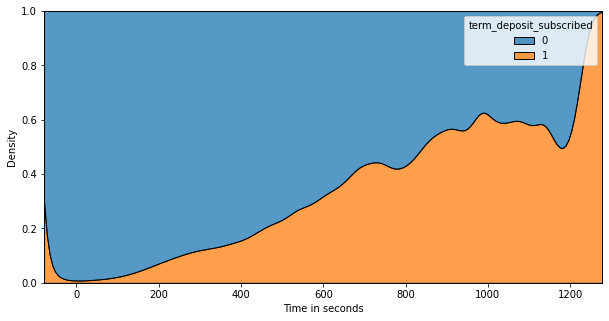

In [21]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=train, x=train.loc[train.last_contact_duration<1200, 'last_contact_duration'], hue='term_deposit_subscribed', multiple = 'fill')
plt.xlabel('Time in seconds')

## If the last contact duration was high, the chances of the customer subscribing is high, as longer duration implies interest of the customer in services offered by the bank. 

# -----------------------------------------------------------------------------------------------------------

# Comparing the distribution of test and training set.
### If the distribution is different, improving our model in training set will not result in any imporvement in test set. 

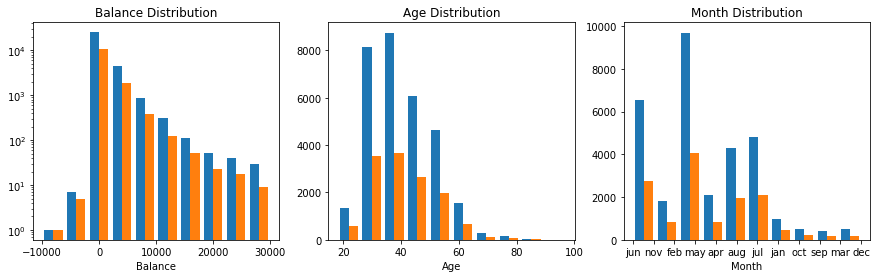

In [17]:
plt.figure(figsize=(15,4))
plt.tight_layout()

plt.subplot(1,3,1)
plt.hist((train.balance, test.balance), range=(-10000,30000), bins = 10, log = 1)
plt.title('Balance Distribution')
plt.xlabel('Balance')

plt.subplot(1,3,2)
plt.hist((train.customer_age, test.customer_age), bins = 10)
plt.title('Age Distribution')
plt.xlabel('Age')

plt.subplot(1,3,3)
plt.hist((train.month, test.month), bins = 10)
plt.title('Month Distribution')
plt.xlabel('Month')

plt.show()

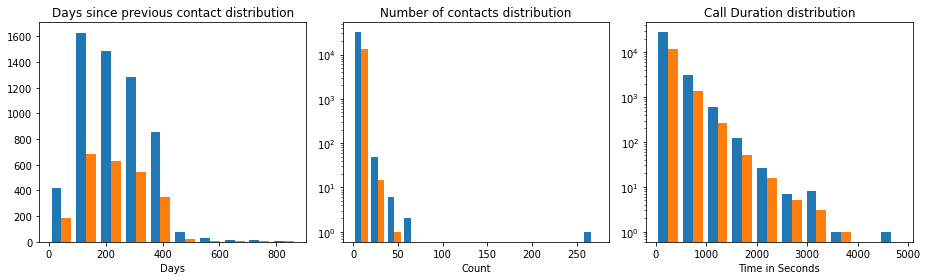

In [18]:
plt.figure(figsize=(13,4))
plt.tight_layout()

plt.subplot(1,3,1)
plt.hist((train.days_since_prev_campaign_contact, test.days_since_prev_campaign_contact), bins = 10)
plt.title('Days since previous contact distribution')
plt.xlabel('Days')

plt.subplot(1,3,2)
plt.hist((train.num_contacts_prev_campaign, test.num_contacts_prev_campaign), bins = 15, log=1)
plt.title('Number of contacts distribution')
plt.xlabel('Count')

plt.subplot(1,3,3)
plt.hist((train.last_contact_duration, test.last_contact_duration), bins = 10, log=1)
plt.title('Call Duration distribution')
plt.xlabel('Time in Seconds')

plt.tight_layout()

plt.show()

In [19]:
#Checking the distribution between train and test data. This will help us tune the model to get highest possible F1 score
columns = test.columns.to_list()
columns.remove('day_of_month')
columns.remove('month')
columns.remove('balance')
columns.remove('customer_age')
columns.remove('days_since_prev_campaign_contact')
columns.remove('num_contacts_prev_campaign')
columns.remove('last_contact_duration')
for c in columns:
    print(train[c].value_counts().sort_index(),"\n", test[c].value_counts().sort_index(), "\n") 

admin.           3627
blue-collar      6816
entrepreneur     1037
housemaid         893
management       6666
retired          1591
self-employed    1111
services         2923
student           663
technician       5220
unemployed        901
unknown           199
Name: job_type, dtype: int64 
 admin.           1544
blue-collar      2916
entrepreneur      450
housemaid         347
management       2792
retired           673
self-employed     468
services         1231
student           275
technician       2377
unemployed        402
unknown            89
Name: job_type, dtype: int64 

divorced     3695
married     18945
single       8857
Name: marital, dtype: int64 
 divorced    1491
married     8123
single      3869
Name: marital, dtype: int64 

primary       4787
secondary    16247
tertiary      9321
unknown       1292
Name: education, dtype: int64 
 primary      2064
secondary    6955
tertiary     3980
unknown       565
Name: education, dtype: int64 

no     31094
yes      553
Name: d

## The distribution of train and test appears to be the same. Thus, working on training set will eventually improve the test set. 

# -----------------------------------------------------------------------------------------------------------

# Data preprocessing 
## Working with Nan values

In [20]:
corr = abs(train.corr())
core = corr.balance.sort_values(ascending = False)
core

balance                             1.000000
days_since_prev_campaign_contact    0.122880
customer_age                        0.103411
term_deposit_subscribed             0.052134
num_contacts_in_campaign            0.020814
last_contact_duration               0.016717
num_contacts_prev_campaign          0.011426
day_of_month                        0.001626
Name: balance, dtype: float64

## Balance and customer age have highest correlation. We will use either of these to fill NaN values of the other. This is more effective and gives higher accuracy than filling the NaN values of any feature with its Mean or Median. 

### NOTE : We are not considering the feature "days_since_prev_campaign_contact" as 80% NaN values in the dataset, hence the correlation value is not an accurate representation for this particular feature. 

In [21]:
print("Rows where both customer age and account balance are not avaiable in : ",len(train.loc[(train.balance.isnull()==True) & (train.customer_age.isnull()==True)]), "\nWe will drop these rows.")
#Dropping specified rows 
train = train.loc[(train.balance.isnull()!=True) | (train.customer_age.isnull()!=True)]
train.reset_index(drop=True, inplace =True)
print('')

Rows where both customer age and account balance are not avaiable in :  8 
We will drop these rows.



In [22]:
balances = [-5000, 0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 60000, 70000, 80000, 90000, 100000, 110000]
for b in balances : 
    m1 = train.customer_age.isnull() == True
    m2 = (train.balance<(b+7500))
    m3 = (train.balance>(b-7500)) 
    value = round(train.loc[m2 & m3, 'customer_age'].mean(),0) 
    i = train.loc[m1 & m2 & m3,'customer_age'].index
    train.loc[i,'customer_age'] = value
del m1, m2, m3, i 


for b in balances : 
    m1 = test.customer_age.isnull() == True
    m2 = (test.balance<(b+7500))
    m3 = (test.balance>(b-7500))
    value = round(test.loc[m2 & m3, 'customer_age'].mean(),0) 
    i = test.loc[m1 & m2 & m3,'customer_age'].index
    test.loc[i,'customer_age'] = value
del m1, m2, m3, i, balances, b

In [23]:
ages = train.customer_age.unique().tolist()
for age in ages:
    value = train.loc[(train.customer_age == age), ['balance']].mean().get('balance')
    m1 =  train.customer_age == age
    m2 = train.balance.isnull()==True
    i = train.loc[m2 & m1, 'balance'].index
    train.loc[i, 'balance'] = value
del ages, m1, m2, i



ages = test.customer_age.unique().tolist()
for age in ages:
    value = test.loc[(test.customer_age == age), ['balance']].mean().get('balance')
    m1 =  test.customer_age == age
    m2 = test.balance.isnull()==True
    i = test.loc[m2 & m1, 'balance'].index
    test.loc[i, 'balance'] = value
del ages, m1, m2, i

In [24]:
i = test.loc[(test.balance.isnull()==True) & test.customer_age.isnull()==True].index
mean_balance = test.balance.mean()
mean_age = round(test.customer_age.mean(), 0)
test.loc[i, ['balance', 'customer_age']] = mean_balance, mean_age

__________________________________________________________________________________________________________________________

# Feature generation
## Combining "personal_loan" and "housing_loan" to generate a new feature "loan"

In [25]:
train['personal_loan'] = train['personal_loan'].replace({'no':0, 'yes':1})
test['personal_loan'] = test['personal_loan'].replace({'no':0, 'yes':1})

from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=10)

col_pl = ['balance', 'personal_loan']
knn.fit(train[col_pl])

r = pd.DataFrame(np.round(knn.transform(train[col_pl]), 0), columns=col_pl)
train['personal_loan'] = r['personal_loan'].astype('int64')

r = pd.DataFrame(np.round(knn.transform(test[col_pl]), 0), columns=col_pl)
test['personal_loan'] = r['personal_loan'].astype('int64')

In [26]:
train['housing_loan'] = train['housing_loan'].replace({'no':0, 'yes':1})
test['housing_loan'] = test['housing_loan'].replace({'no':0, 'yes':1})

train['loan'] = (train.personal_loan | train.housing_loan)
train['loan'] = train['loan'].astype('int64')

test['loan'] = (test.personal_loan | test.housing_loan)
test['loan'] = test['loan'].astype('int64')


train.drop('personal_loan', axis=1, inplace=True)
test.drop('personal_loan', axis=1, inplace=True)

train.drop('housing_loan', axis=1, inplace=True)
test.drop('housing_loan', axis=1, inplace=True)

## Data scaling and imputing 

### For a Neural Network architecture, One-Hot encoding is more effective in recognizing patterns than Label/Frequency Encoding. 
### Features are scaled about mean=0 and unit variance. Gradients in Neural Networks tend to explode or vanish on unscaled features.
### Normalising help Neural Networks converge faster to the "Saddle point"

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [28]:
train.last_contact_duration.fillna(value = train.last_contact_duration.mean(), inplace= True)
test.last_contact_duration.fillna(value = test.last_contact_duration.mean(), inplace=True)

In [29]:
#Label encoding of education as the data is ordinal 
train['education'] = train['education'].replace({'unknown':0, 'primary':1, 'secondary':2, 'tertiary':3})
test['education'] = test['education'].replace({'unknown':0, 'primary':1, 'secondary':2, 'tertiary':3})

In [30]:
scaler = StandardScaler()
scaler.fit(train.education.values.reshape(-1,1))

new_edu = scaler.transform(train.education.values.reshape(-1,1))
train['education'] = new_edu

new_edu = scaler.transform(test.education.values.reshape(-1,1))
test['education'] = new_edu

In [31]:
train['last_contact_duration'] = np.clip(train.last_contact_duration,a_min=None, a_max=3000) 
test['last_contact_duration'] = np.clip(test.last_contact_duration,a_min=None, a_max=3000) 

scaler = StandardScaler()
scaler.fit(train.last_contact_duration.values.reshape(-1,1))

new_con = scaler.transform(train.last_contact_duration.values.reshape(-1,1))
train['last_contact_duration'] = new_con

new_con = scaler.transform(test.last_contact_duration.values.reshape(-1,1))
test['last_contact_duration'] = new_con

In [32]:
train['num_contacts_prev_campaign'] = np.clip(train.num_contacts_prev_campaign,a_min=None, a_max=26) 
test['num_contacts_prev_campaign'] = np.clip(test.num_contacts_prev_campaign,a_min=None, a_max=26) 

scaler = StandardScaler()
scaler.fit(train.num_contacts_prev_campaign.values.reshape(-1,1))

new_con = scaler.transform(train.num_contacts_prev_campaign.values.reshape(-1,1))
train['num_contacts_prev_campaign'] = new_con

new_con = scaler.transform(test.num_contacts_prev_campaign.values.reshape(-1,1))
test['num_contacts_prev_campaign'] = new_con

In [33]:
train['balance'] = np.clip(train.balance,a_min=None, a_max=40000) 
test['balance'] = np.clip(train.balance,a_min=None, a_max=40000) 

scaler = StandardScaler()
scaler.fit(train.balance.values.reshape(-1,1))

new_balance = scaler.transform(train.balance.values.reshape(-1,1))
train['balance'] = new_balance

new_balance = scaler.transform(test.balance.values.reshape(-1,1))
test['balance'] = new_balance

In [34]:
scaler = StandardScaler()
scaler.fit(train.customer_age.values.reshape(-1,1))

new_age = scaler.transform(train.customer_age.values.reshape(-1,1))
train['customer_age'] = new_age

new_age = scaler.transform(test.customer_age.values.reshape(-1,1))
test['customer_age'] = new_age

In [35]:
le = LabelEncoder()
le.fit(train.month)
new_m = le.transform(train.month)
train['month'] = new_m

new_m = le.transform(test.month)
test['month'] = new_m

scaler = StandardScaler()
scaler.fit(train.month.values.reshape(-1,1))

new_month = scaler.transform(train.month.values.reshape(-1,1))
train['month'] = new_month

new_month = scaler.transform(test.month.values.reshape(-1,1))
test['month'] = new_month

In [36]:
le = LabelEncoder()
le.fit(train.job_type)
new_m = le.transform(train.job_type)
train['job_type'] = new_m

new_m = le.transform(test.job_type)
test['job_type'] = new_m

scaler = StandardScaler()
scaler.fit(train.job_type.values.reshape(-1,1))

new_jt = scaler.transform(train.job_type.values.reshape(-1,1))
train['job_type'] = new_jt

new_jt = scaler.transform(test.job_type.values.reshape(-1,1))
test['job_type'] = new_jt

In [37]:
scaler = StandardScaler()
scaler.fit(train.day_of_month.values.reshape(-1,1))

new_day = scaler.transform(train.day_of_month.values.reshape(-1,1))
train['day_of_month'] = new_day

new_day = scaler.transform(test.day_of_month.values.reshape(-1,1))
test['day_of_month'] = new_day

In [38]:
train['marital'] = train['marital'].replace({'single':3, 'married':1, 'divorced':2})
test['marital'] = test['marital'].replace({'single':3, 'married':1, 'divorced':2})

In [39]:
knn = KNNImputer(n_neighbors=10)

col_marital = ['customer_age', 'education', 'marital']
knn.fit(train[col_marital])

r = pd.DataFrame(np.round(knn.transform(train[col_marital]), 0), columns=col_marital)
train['marital'] = r['marital']

r = pd.DataFrame(np.round(knn.transform(test[col_marital]), 0), columns=col_marital)
test['marital'] = r['marital']

In [40]:
train = train.join(pd.get_dummies(train.marital, prefix = 'marital'))
train.drop('marital', axis=1, inplace = True)

test = test.join(pd.get_dummies(test.marital, prefix='marital'))
test.drop('marital', axis=1, inplace = True)

In [41]:
train = train.join(np.round(pd.get_dummies(train.default, prefix='default'), 0))
train.drop('default', axis=1, inplace = True)

test = test.join(pd.get_dummies(test.default, prefix = 'default'))
test.drop('default', axis=1, inplace = True)

In [42]:
train = train.join(pd.get_dummies(train.communication_type, prefix='communication_type'))
train.drop('communication_type', axis=1, inplace = True)

test = test.join(pd.get_dummies(test.communication_type, prefix = 'communication_type'))
test.drop('communication_type', axis=1, inplace = True)

In [43]:
train = train.join(pd.get_dummies(train.prev_campaign_outcome, prefix='prev_campaign_outcome'))
train.drop('prev_campaign_outcome', axis=1, inplace = True)

test = test.join(pd.get_dummies(test.prev_campaign_outcome, prefix = 'prev_campaign_outcome'))
test.drop('prev_campaign_outcome', axis=1, inplace = True)

In [44]:
knn = KNNImputer(n_neighbors=10)

col_days = ['month', 'balance', 'customer_age', 'education', 'days_since_prev_campaign_contact']
knn.fit(train[col_days])

r = pd.DataFrame(knn.transform(train[col_days]), columns=col_days)
train['days_since_prev_campaign_contact'] = r['days_since_prev_campaign_contact']

r =  pd.DataFrame(knn.transform(test[col_days]), columns=col_days)
test['days_since_prev_campaign_contact'] = r['days_since_prev_campaign_contact']

In [45]:
knn = KNNImputer(n_neighbors=10)
col_nums = ['day_of_month', 'num_contacts_in_campaign']
knn.fit(train[col_nums])
r =  pd.DataFrame(knn.transform(train[col_nums]), columns=col_nums)
train['num_contacts_in_campaign'] = r['num_contacts_in_campaign']


r =  pd.DataFrame(knn.transform(test[col_nums]), columns=col_nums)
test['num_contacts_in_campaign'] = r['num_contacts_in_campaign']

In [46]:
train['num_contacts_in_campaign'] = np.clip(train.num_contacts_in_campaign,a_min=None, a_max=30) 
test['num_contacts_in_campaign'] = np.clip(test.num_contacts_in_campaign,a_min=None, a_max=30) 

scaler = StandardScaler()
scaler.fit(train.num_contacts_in_campaign.values.reshape(-1,1))

new_con = scaler.transform(train.num_contacts_in_campaign.values.reshape(-1,1))
train['num_contacts_in_campaign'] = new_con

new_con = scaler.transform(test.num_contacts_in_campaign.values.reshape(-1,1))
test['num_contacts_in_campaign'] = new_con

In [47]:
train['days_since_prev_campaign_contact'] = np.clip(train.days_since_prev_campaign_contact,a_min=None, a_max=600) 
test['days_since_prev_campaign_contact'] = np.clip(test.days_since_prev_campaign_contact,a_min=None, a_max=600) 

scaler = StandardScaler()
scaler.fit(train.days_since_prev_campaign_contact.values.reshape(-1,1))

new_con = scaler.transform(train.days_since_prev_campaign_contact.values.reshape(-1,1))
train['days_since_prev_campaign_contact'] = new_con

new_con = scaler.transform(test.days_since_prev_campaign_contact.values.reshape(-1,1))
test['days_since_prev_campaign_contact'] = new_con

In [48]:
print(train.isnull().sum(axis=0).sum(), test.isnull().sum(axis=0).sum())

0 0


## Converting dataset to feed into Neural Network

In [49]:
y = train['term_deposit_subscribed'].values
X = train.drop('term_deposit_subscribed', axis=1)
x = X.values
x.shape

(31639, 23)

In [50]:
print(train.term_deposit_subscribed.value_counts().to_list())
print("Ration of No to Yes is " ,train.term_deposit_subscribed.value_counts()[1]/train.term_deposit_subscribed.value_counts()[0])

[28245, 3394]
Ration of No to Yes is  0.12016286068330678


## Because of the skewed dataset (ratio of term deposit not subscribed to term deposit  subscribed is around 0.1), we will use Stratified shuffle split so the distribution of target values are the same in train and validation set. This is a  very significant when working with skewed data.

In [51]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=14)

for train_index, test_index in sss.split(x, y):
    xtrain, xval = x[train_index], x[test_index]
    ytrain, yval = y[train_index], y[test_index]

## Building Neural Network model.

In [52]:
import tensorflow as tf 

In [53]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(23,)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(8, activation='relu'),
    #tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(4, activation='relu'),
    #tf.keras.layers.Dropout(0.4), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               6144      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                5

In [55]:
from keras import backend as K

def f1(y_true, y_pred):
    
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    precision = true_positives / (predicted_positives + K.epsilon())
    f1 = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1


model.compile(loss='binary_crossentropy', optimizer= "adam", metrics=[f1,'AUC'])

In [56]:
annealer = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-3)

In [57]:
model.fit(xtrain, ytrain, epochs=200, validation_data=(xval, yval), shuffle=True, callbacks=[annealer])

Epoch 1/200
791/791 [==============================] - 2s 2ms/step - loss: 0.3052 - f1: 0.1083 - auc: 0.7941 - val_loss: 0.2073 - val_f1: 0.5026 - val_auc: 0.9157
Epoch 2/200
791/791 [==============================] - 2s 2ms/step - loss: 0.2241 - f1: 0.3470 - auc: 0.8985 - val_loss: 0.2021 - val_f1: 0.4812 - val_auc: 0.9208
Epoch 3/200
791/791 [==============================] - 1s 2ms/step - loss: 0.2153 - f1: 0.4212 - auc: 0.9079 - val_loss: 0.2019 - val_f1: 0.4386 - val_auc: 0.9227
Epoch 4/200
791/791 [==============================] - 2s 2ms/step - loss: 0.2124 - f1: 0.4428 - auc: 0.9097 - val_loss: 0.2104 - val_f1: 0.5487 - val_auc: 0.9230
Epoch 5/200
791/791 [==============================] - 2s 2ms/step - loss: 0.2078 - f1: 0.4421 - auc: 0.9153 - val_loss: 0.2001 - val_f1: 0.4747 - val_auc: 0.9231
Epoch 6/200
791/791 [==============================] - 2s 2ms/step - loss: 0.2072 - f1: 0.4498 - auc: 0.9153 - val_loss: 0.1991 - val_f1: 0.4689 - val_auc: 0.9237
Epoch 7/200
791/791 [=

Epoch 45/200
791/791 [==============================] - 2s 2ms/step - loss: 0.1746 - f1: 0.5495 - auc: 0.9436 - val_loss: 0.1883 - val_f1: 0.4480 - val_auc: 0.9356
Epoch 46/200
791/791 [==============================] - 2s 2ms/step - loss: 0.1719 - f1: 0.5490 - auc: 0.9457 - val_loss: 0.1886 - val_f1: 0.5148 - val_auc: 0.9355
Epoch 47/200
768/791 [============================>.] - ETA: 0s - loss: 0.1727 - f1: 0.5529 - auc: 0.9443
Epoch 00047: ReduceLROnPlateau reducing learning rate to 0.001.
791/791 [==============================] - 2s 2ms/step - loss: 0.1730 - f1: 0.5525 - auc: 0.9442 - val_loss: 0.1909 - val_f1: 0.5631 - val_auc: 0.9350
Epoch 48/200
791/791 [==============================] - 2s 2ms/step - loss: 0.1704 - f1: 0.5617 - auc: 0.9465 - val_loss: 0.1888 - val_f1: 0.5354 - val_auc: 0.9329
Epoch 49/200
791/791 [==============================] - 2s 2ms/step - loss: 0.1722 - f1: 0.5513 - auc: 0.9446 - val_loss: 0.1984 - val_f1: 0.5789 - val_auc: 0.9351
Epoch 50/200
783/791 [=

Epoch 121/200
791/791 [==============================] - 2s 3ms/step - loss: 0.1495 - f1: 0.6286 - auc: 0.9601 - val_loss: 0.2006 - val_f1: 0.5598 - val_auc: 0.9279
Epoch 122/200
791/791 [==============================] - 2s 3ms/step - loss: 0.1516 - f1: 0.6238 - auc: 0.9590 - val_loss: 0.1987 - val_f1: 0.5501 - val_auc: 0.9302
Epoch 123/200
788/791 [============================>.] - ETA: 0s - loss: 0.1516 - f1: 0.6169 - auc: 0.9582
Epoch 00123: ReduceLROnPlateau reducing learning rate to 0.001.
791/791 [==============================] - 2s 3ms/step - loss: 0.1516 - f1: 0.6166 - auc: 0.9582 - val_loss: 0.1971 - val_f1: 0.5463 - val_auc: 0.9285
Epoch 124/200
791/791 [==============================] - 2s 3ms/step - loss: 0.1491 - f1: 0.6080 - auc: 0.9604 - val_loss: 0.2027 - val_f1: 0.5743 - val_auc: 0.9278
Epoch 125/200
791/791 [==============================] - 2s 3ms/step - loss: 0.1500 - f1: 0.6088 - auc: 0.9599 - val_loss: 0.1989 - val_f1: 0.5592 - val_auc: 0.9298
Epoch 126/200
769/

791/791 [==============================] - 2s 2ms/step - loss: 0.1419 - f1: 0.6392 - auc: 0.9642 - val_loss: 0.2160 - val_f1: 0.5690 - val_auc: 0.9249
Epoch 197/200
791/791 [==============================] - 2s 2ms/step - loss: 0.1425 - f1: 0.6292 - auc: 0.9645 - val_loss: 0.2138 - val_f1: 0.5640 - val_auc: 0.9263
Epoch 198/200
775/791 [============================>.] - ETA: 0s - loss: 0.1416 - f1: 0.6426 - auc: 0.9650
Epoch 00198: ReduceLROnPlateau reducing learning rate to 0.001.
791/791 [==============================] - 2s 2ms/step - loss: 0.1413 - f1: 0.6425 - auc: 0.9652 - val_loss: 0.2161 - val_f1: 0.5683 - val_auc: 0.9254
Epoch 199/200
791/791 [==============================] - 2s 2ms/step - loss: 0.1428 - f1: 0.6310 - auc: 0.9645 - val_loss: 0.2185 - val_f1: 0.5614 - val_auc: 0.9240
Epoch 200/200
791/791 [==============================] - 2s 2ms/step - loss: 0.1409 - f1: 0.6446 - auc: 0.9650 - val_loss: 0.2222 - val_f1: 0.5678 - val_auc: 0.9228


In [58]:
xtest = pd.read_csv('Test data.csv')
sample = xtest['id']
sample = pd.DataFrame(sample)

In [59]:
p_y = model.predict(test)
p_y = p_y.flatten()
print(p_y)
p_y=np.round(p_y,0)
print(p_y)
sample['term_deposit_subscribed'] = p_y

[5.8662124e-07 6.5663103e-06 7.0638657e-02 ... 1.3716763e-09 2.2791993e-07
 3.7613511e-04]
[0. 0. 0. ... 0. 0. 0.]


In [60]:
sample.to_csv('Predictions.csv', index=False)